# 🧪 STI dataset — Cleaning, Visualization & Model Selection




## 📦 1. Importing Libraries

In [1]:
# 📦 Data Manipulation
import pandas as pd
import numpy as np

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 🧹 Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# 🤖 Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# ⚖️ Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report

# 💾 Save Model
import joblib


## 📂 2. Loading the Dataset

In [2]:
# Cell: Load dataset
import pandas as pd
df = pd.read_csv("stidd.csv")
df.head()

,itching_genitals,pain_during_urination,blisters_genitals,abnormal_discharge,bleeding_after_sex,swollen_lymph_nodes,fatigue,fever,flu_like_symptoms,genital_warts,...,malaise,scabies,pubic_lice,painful_sex,sore_throat,abdominal_pain,weight_loss,skin_rash,swollen_extremities,stis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,1.0,0,Syphilis
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0.0,0,Gonorrhea
2,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0.0,0,1,0,0.0,0,Hepatitis_C
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0.0,0,0,0,0.0,0,Syphilis
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,NaN,0,Molluscum_Contagiosum


## 🔍 3. Exploratory Data Analysis (EDA)

In [3]:
# Display basic info
print(df.shape)
print(df.columns.tolist())

(600, 32)
['itching_genitals', 'pain_during_urination', 'blisters_genitals', 'abnormal_discharge', 'bleeding_after_sex', 'swollen_lymph_nodes', 'fatigue', 'fever', 'flu_like_symptoms', 'genital_warts', 'ulcers_genitals', 'pain_lower_tummy', 'itching_body', 'night_itching', 'blue_spots', 'pimples', 'rash_hands_feet', 'mouth_ulcers', 'headache', 'burning_micturition', 'spotting_urination', 'night_sweats', 'malaise', 'scabies', 'pubic_lice', 'painful_sex', 'sore_throat', 'abdominal_pain', 'weight_loss', 'skin_rash', 'swollen_extremities', 'stis']


## 🧹 4. Data Cleaning


### 🔄 Cell: Initial inspection

In [4]:
print('Missing values:')
print(df.isna().sum().sort_values(ascending=False).head(20))
print('Duplicates:', df.duplicated().sum())
print('\nNumeric describe:')
print(df.describe(include='number').T)


Missing values:
skin_rash                12
painful_sex              12
ulcers_genitals          12
night_sweats             12
spotting_urination       12
itching_genitals          0
mouth_ulcers              0
swollen_extremities       0
weight_loss               0
abdominal_pain            0
sore_throat               0
pubic_lice                0
scabies                   0
malaise                   0
burning_micturition       0
headache                  0
rash_hands_feet           0
pain_during_urination     0
pimples                   0
blue_spots                0
dtype: int64
Duplicates: 501

Numeric describe:
                       count      mean       std  min  25%  50%  75%   max
itching_genitals       600.0  0.300000  0.458640  0.0  0.0  0.0  1.0   1.0
pain_during_urination  600.0  0.168333  0.374474  0.0  0.0  0.0  0.0   1.0
blisters_genitals      600.0  0.186667  0.389969  0.0  0.0  0.0  0.0   1.0
abnormal_discharge     600.0  0.303333  0.495039 -1.0  0.0  0.0  1.0   1.0
b

### 🧾 4.1 Handling Duplicates

In [5]:
print('Duplicates before:', df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print('Duplicates after:', df.duplicated().sum())


Duplicates before: 501
Duplicates after: 0


### 🌀 4.2 Standardizing Text Columns

In [6]:

obj_cols = df.select_dtypes(include='object').columns.tolist()
print('Object cols:', obj_cols)

def clean_string_vals(x):
    if pd.isna(x):
        return x
    s = str(x).strip()
    s_lower = s.lower()
    if s_lower in ('yes','y','true','t','1','positive','pos'):
        return 'yes'
    if s_lower in ('no','n','false','f','0','negative','neg'):
        return 'no'
    return s

for c in obj_cols:
    df[c] = df[c].apply(clean_string_vals)

print('Standardization done.')


Object cols: ['stis']
Standardization done.


### 🕳️ 4.3 Handling Missing Values

In [7]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = [c for c in df.select_dtypes(include='object').columns.tolist()]
print('Numeric:', num_cols)
print('Categorical:', cat_cols)

if len(num_cols)>0:
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
if len(cat_cols)>0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print('Missing values after imputation:')
print(df.isna().sum().sum())


Numeric: ['itching_genitals', 'pain_during_urination', 'blisters_genitals', 'abnormal_discharge', 'bleeding_after_sex', 'swollen_lymph_nodes', 'fatigue', 'fever', 'flu_like_symptoms', 'genital_warts', 'ulcers_genitals', 'pain_lower_tummy', 'itching_body', 'night_itching', 'blue_spots', 'pimples', 'rash_hands_feet', 'mouth_ulcers', 'headache', 'burning_micturition', 'spotting_urination', 'night_sweats', 'malaise', 'scabies', 'pubic_lice', 'painful_sex', 'sore_throat', 'abdominal_pain', 'weight_loss', 'skin_rash', 'swollen_extremities']
Categorical: ['stis']
Missing values after imputation:
0


### 🚨 4.4 Handling Outliers

In [8]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
for c in num_cols:
    if df[c].nunique()>10:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3-Q1
        lower = Q1-1.5*IQR
        upper = Q3+1.5*IQR
        print(c, 'outliers:', ((df[c]<lower)|(df[c]>upper)).sum())


### 🔄 Converting Boolean-like Columns ("yes"/"no") to Binary

In [9]:
bool_like_cols = [c for c in df.columns if df[c].dropna().astype(str).isin(['yes','no']).all()]
print('Boolean-like:', bool_like_cols)
for c in bool_like_cols:
    df[c] = df[c].map({'yes':1,'no':0}).astype(int)
print('Done.')

Boolean-like: []
Done.


### 💾 4.5 Save Cleaned Dataset

In [10]:
df.to_csv("sti_cleaned.csv", index=False)
print("Cleaned dataset saved as sti_cleaned.csv")


Cleaned dataset saved as sti_cleaned.csv


## 📊 5. Data Visualization

### 🦠 Most Common Diseases in the Dataset


C:\Users\Jeffrey\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129440 (\N{MICROBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


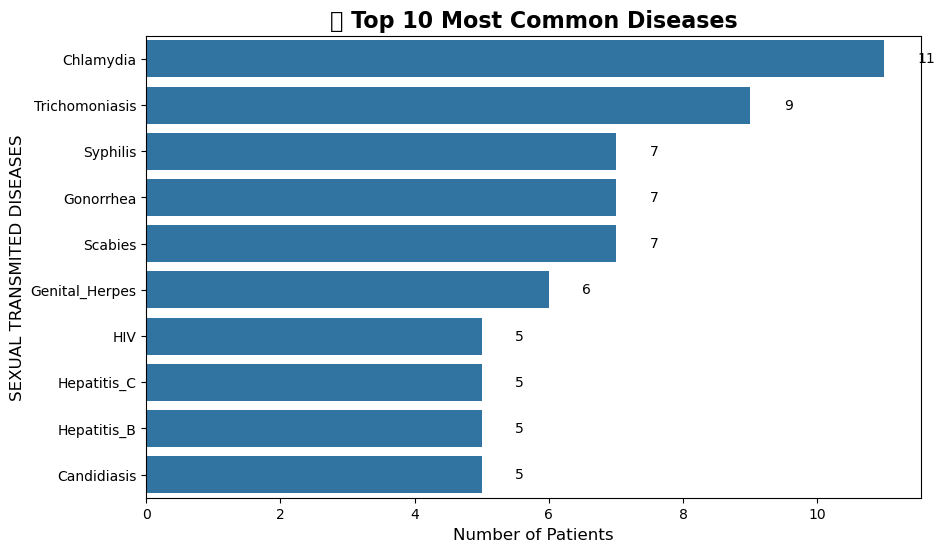

In [11]:
DISEASE_COL = "stis"
# Define hospital-inspired colors
hospital_colors = {
    "primary": "#1f77b4",   # professional blue
    "secondary": "#2ca02c", # calming green
    "accent": "#17becf",    # teal
    "neutral": "#7f7f7f"    # soft gray
}

# Automatically detect numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Prepare top 10 diseases
disease_counts = df[DISEASE_COL].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=disease_counts.values,
    y=disease_counts.index,
    palette=[hospital_colors["primary"]] * len(disease_counts)
)

# Add counts on bars
for i, v in enumerate(disease_counts.values):
    plt.text(v + 0.5, i, str(v), va='center', fontsize=10, color="black")

plt.title("🦠 Top 10 Most Common Diseases", fontsize=16, weight="bold")
plt.xlabel("Number of Patients", fontsize=12)
plt.ylabel("SEXUAL TRANSMITED DISEASES", fontsize=12)
plt.show()


### 🤒 Most Common Symptoms of STIsed.


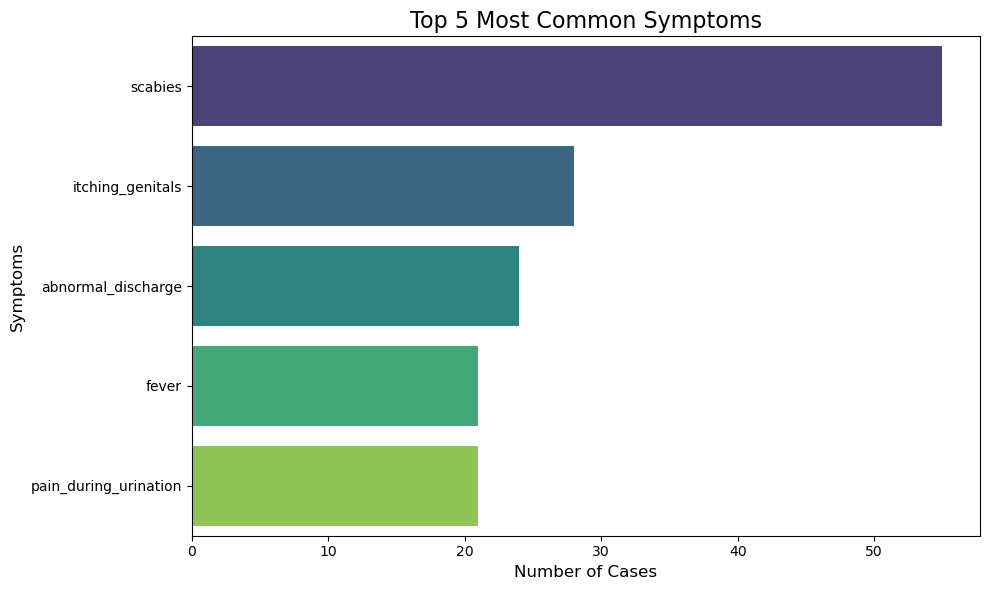

In [12]:
# Step 1: Sum up each symptom column to find frequency
symptom_columns = df.columns[:-1]  # all columns except 'stis'
symptom_counts = df[symptom_columns].sum().sort_values(ascending=False)

# Step 2: Select top 5 most common symptoms
top5_symptoms = symptom_counts.head(5)

# Step 3: Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top5_symptoms.values, y=top5_symptoms.index, palette='viridis')
plt.title("Top 5 Most Common Symptoms", fontsize=16)
plt.xlabel("Number of Cases", fontsize=12)
plt.ylabel("Symptoms", fontsize=12)
plt.tight_layout()
plt.show()

### 📈  Distribution of Numeric Features

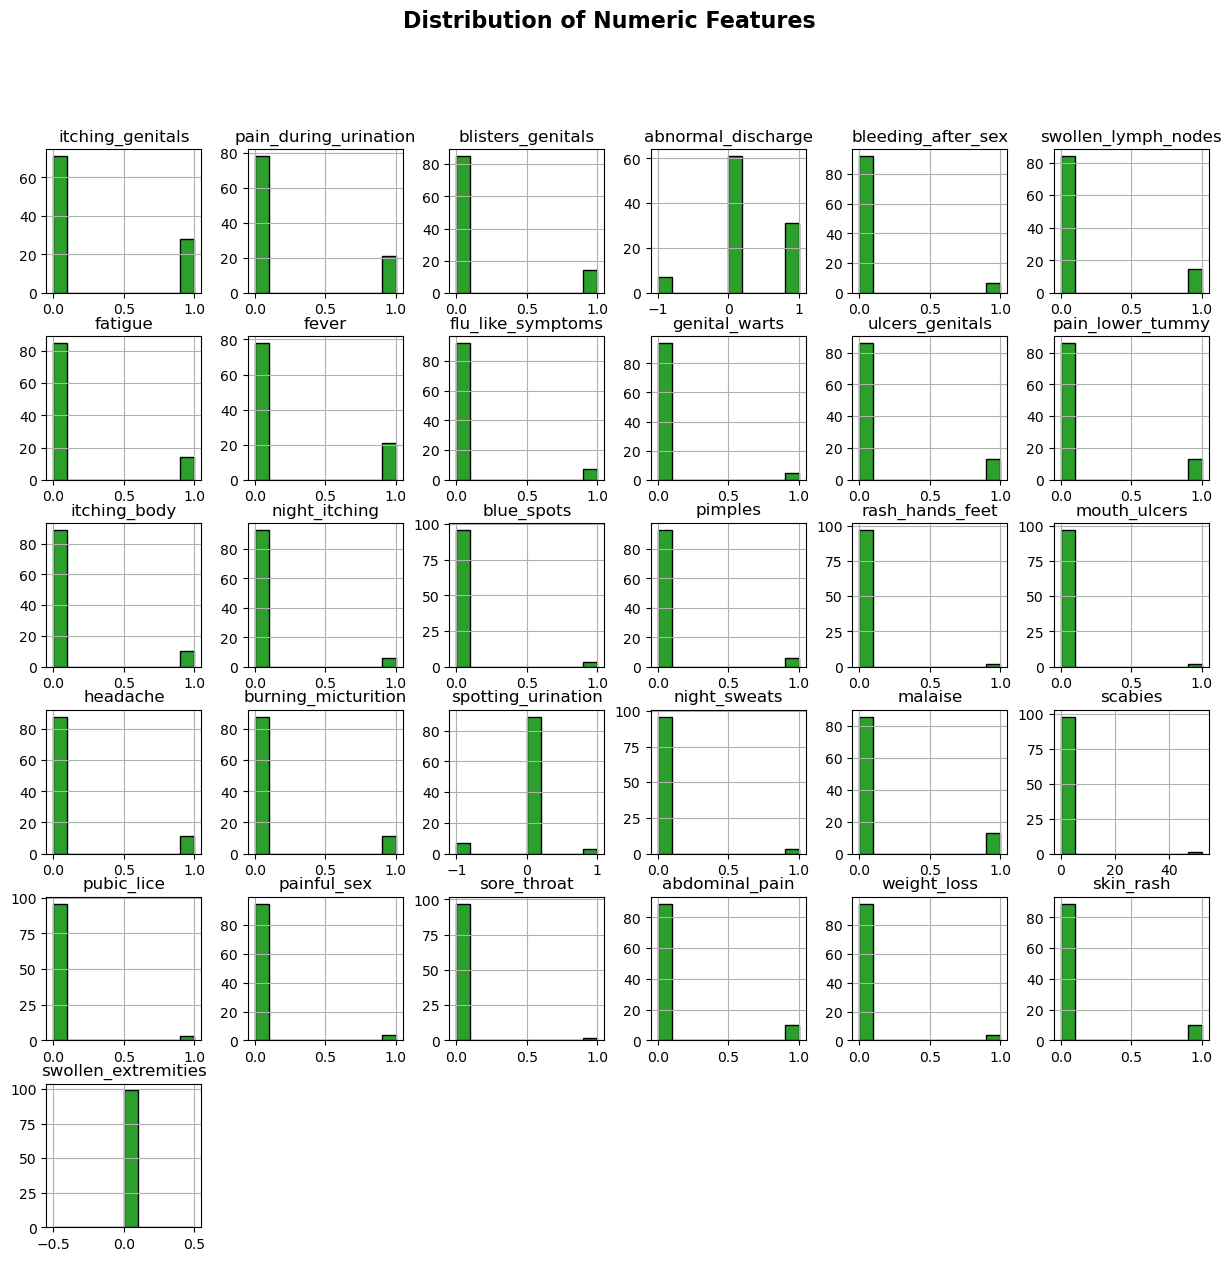

In [13]:
df[numeric_cols].hist(
    figsize=(15,14),
    color=hospital_colors["secondary"],
    edgecolor="black"
)
plt.suptitle("Distribution of Numeric Features", fontsize=16, weight="bold")
plt.show()


### 🔗 4. Correlation Heatmap


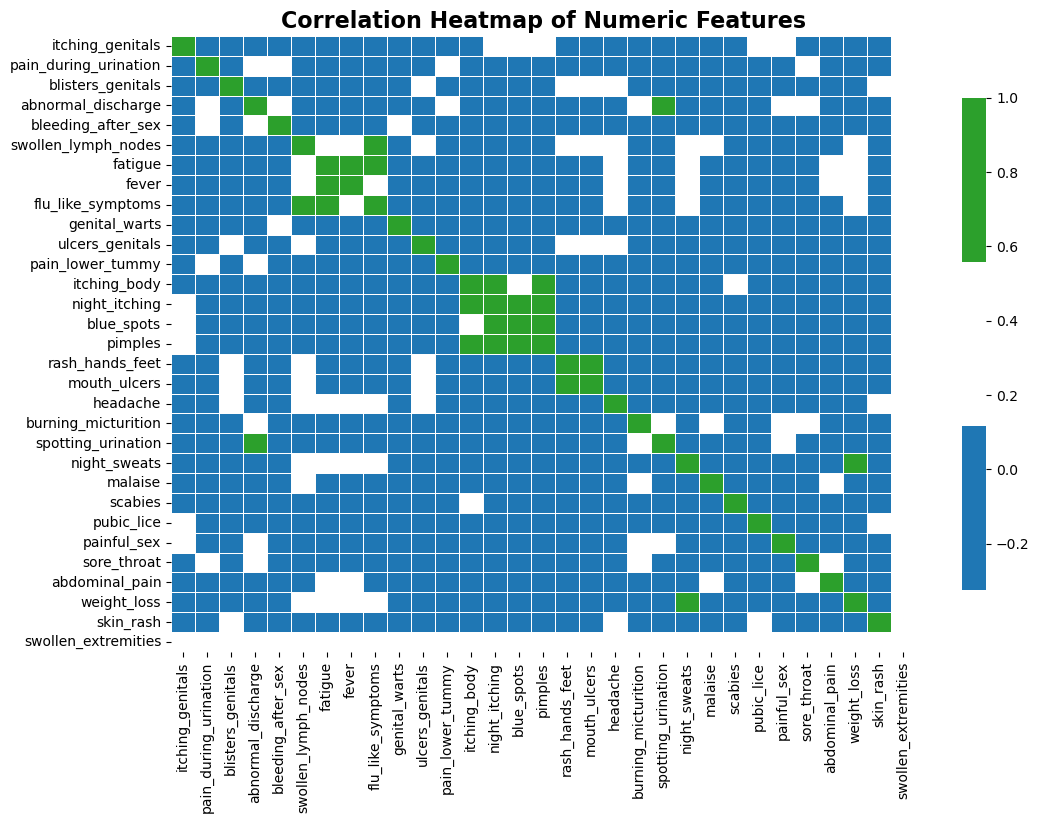

In [14]:
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
sns.heatmap(
    corr,
    annot=False,
    cmap=sns.color_palette([hospital_colors["primary"],"#ffffff",hospital_colors["secondary"]]),
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16, weight="bold")
plt.show()


## ✂️ 6. Feature–Target Split

In [15]:
# Cell: Feature/target split
TARGET_NAME = 'stis'
print('Target column used:', TARGET_NAME)
y = df[TARGET_NAME]
X = df.drop(columns=[TARGET_NAME])
print('X shape:', X.shape, 'y shape:', y.shape)


Target column used: stis
X shape: (99, 31) y shape: (99,)


## 🤖🏆 7. Model Building, Selection & Evaluation  

In this section, we will:  

1. **Build multiple machine learning models** 🤖  
   - Logistic Regression ⚖️  
   - Random Forest 🌲  
   - Gradient Boosting 🌟  
   - K-Nearest Neighbors 👥  
   - Support Vector Machine 🔗  

2. **Train & Test Models** 🏋️  
   - Split dataset into training (80%) and testing (20%) sets.  
   - Use preprocessing pipelines for scaling and encoding.  

3. **Evaluate Performance** ⚖️  
   - Metrics: **Accuracy 🎯, Precision 🎯, F1-score 📏**  
   - Visualize results using **confusion matrix 📊**  

4. **Select the Best Model** 🏆  
   - Compare models across metrics.  
   - Choose the one with the **highest balanced performance**.  
   - Save the best model as `.joblib` for reuse 💾  

---


### 🧠 MSU-STI SMARTCARE Model

We have successfully trained annow savinged the **Random Forest classifier** for STI prediction.  
This model includes **full preprocessing steps**, so it’s ready to use on new patient data.

- **Model Name:** MSU-STI SMARTCARE 🏥
- **Algorithm:** Random Forest 🌳
- **Number of Trees:** 200 🌲🌲🌲
- **Saved File:** `MSU-STI-SMARTCARE.joblib` 💾
- **Purpose:** Predicting common STI symptoms efficiently ⚡

> 🚀 The model pipeline includes numeric scaling, categorical encoding, and robust handling of missing data, ensuring reliable predictions for healthcare applications.



In [16]:
# Cell: Preprocessing and model comparison
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numeric_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', cat_transformer, categorical_features)])

models = [
    ('LogisticRegression', LogisticRegression(max_iter=2000)),
    ('RandomForest', RandomForestClassifier(n_estimators=200)),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('KNeighbors', KNeighborsClassifier()),
    ('SVC', SVC())
]

results = []
for name, m in models:
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', m)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    results.append({'model': name, 'accuracy': accuracy_score(y_test, y_pred), 'precision_macro': precision_score(y_test, y_pred, average='macro', zero_division=0), 'f1_macro': f1_score(y_test, y_pred, average='macro', zero_division=0)})

import pandas as pd
pd.DataFrame(results).sort_values(by='f1_macro', ascending=False)


,model,accuracy,precision_macro,f1_macro
1,RandomForest,0.8,0.777778,0.796296
2,GradientBoosting,0.7,0.680556,0.698148
0,LogisticRegression,0.6,0.509259,0.550000
4,SVC,0.6,0.518519,0.546296
3,KNeighbors,0.6,0.481481,0.527778


In [17]:
import joblib

# Train the RandomForest pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier(n_estimators=200))])
rf_model.fit(X_train, y_train)

# Save the model
joblib.dump(rf_model, 'MSU-STI-SMARTCARE.joblib')
print("✅ Random Forest model saved as 'MSU-STI-SMARTCARE.joblib' 🎉")


✅ Random Forest model saved as 'MSU-STI-SMARTCARE.joblib' 🎉
